# Tutorial 7: Exact Diagonalization of Transverse Ising Model

## Conjugated Gradient

 Use Conjugate Gradient iteration to solve `Ax = b`.

In [ ]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import cg

P = np.array([[4, 0, 1, 0], [0, 5, 0, 0], [1, 0, 3, 2], [0, 0, 2, 4]])
A = csc_matrix(P)
b = np.array([-1, -0.5, -1, 2])
x, exit_code = cg(A, b, atol=1e-5)
print(exit_code)  # 0 indicates successful convergence


np.allclose(A.dot(x), b)

## Exact Diagonalization of a 1D Quantum Ising Model

This is a simple code for exact diagonalization to find the ground state of a 1D quantum Ising model. The Hamiltonian is generated in a naive way and no symmetries are implemented. 

Run the program and experiment with differen sizes of $L$. 

L:4
 elased time:
gen_spin 18015000ns, gen_Hamil 46494044000 ns
L:8
 elased time:
gen_spin 32743000ns, gen_Hamil 46554613000 ns
L:16
 elased time:
gen_spin 218824000ns, gen_Hamil 46708044000 ns


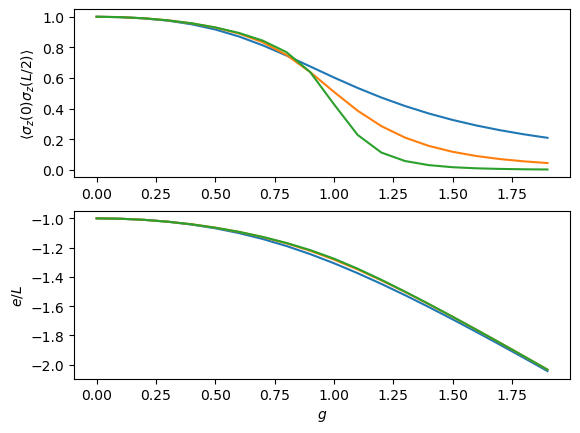

In [ ]:
""" Exact diagonalization code to find the ground state of 
a 1D quantum Ising model."""

import scipy.sparse as sparse 
import numpy as np 
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from time import process_time_ns

def gen_spin_operators(L): 
	"""" Returns the spin operators sigma_x and sigma_z for L sites """
	sx = sparse.csr_matrix(np.array([[0.,1.],[1.,0.]]))
	sz = sparse.csr_matrix(np.array([[1.,0.],[0.,-1.]]))
	    
	d = 2
	sx_list = []
	sz_list = []

	for i_site in range(L): 
		if i_site==0: 
			X=sx
			Z=sz 
		else: 
			X= sparse.csr_matrix(np.eye(d)) 
			Z= sparse.csr_matrix(np.eye(d))
            
		for j_site in range(1,L): 
			if j_site==i_site: 
				X=sparse.kron(X,sx, 'csr')
				Z=sparse.kron(Z,sz, 'csr') 
			else: 
				X=sparse.kron(X,np.eye(d),'csr') 
				Z=sparse.kron(Z,np.eye(d),'csr') 
		sx_list.append(X)
		sz_list.append(Z) 
		
	return sx_list,sz_list 

def gen_hamiltonian(sx_list,sz_list,L): 
	"""" Generates the Hamiltonian """    
	H_zz = sparse.csr_matrix((2**L,2**L))
	H_x = sparse.csr_matrix((2**L,2**L))       
	    
	for i in range(L):
		H_zz = H_zz + sz_list[i]*sz_list[np.mod(i+1,L)]
		H_x = H_x + sx_list[i]
     
	return H_zz, H_x 
	


# Set parameters here	
L_list = [4,8,16]

g_list = np.arange(0,2,0.1)
fig=plt.figure()
for L in L_list:
	t=process_time_ns()
	sx_list,sz_list  = gen_spin_operators(L)
	t1=process_time_ns()-t
	H_zz, H_x = gen_hamiltonian(sx_list,sz_list,L)
	elapsed=process_time_ns()-t1
	print(f"L:{L}")
	print("elased time:")
	print(f"gen_spin {t1}ns, gen_Hamil {elapsed} ns\n")
	m_list = []
	e_list = []
	for g in g_list:
		H = -H_zz + g*H_x
		e,v = eigsh(H,k=1,which='SA',return_eigenvectors=True)
		## Measure the spin-spin correlation function at the longest distance
		m_list.append(np.dot(v.T,sz_list[0]*sz_list[L//2]*v).item())
		e_list.append(e/L)
	plt.subplot(211)
	plt.plot(g_list,m_list)
	plt.subplot(212)
	plt.plot(g_list,e_list)
	
plt.xlabel("$g$")
plt.subplot(211)
plt.ylabel("$\\langle \\sigma_z(0)\\sigma_z(L/2) \\rangle$")
plt.subplot(212)
plt.ylabel("$e/L$")
plt.show()
	
		
		
		
		
		
